In [1]:
# imported libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures

# local imports
import wrangle as w

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# Exploration Working Notebook

In [2]:
import wrangle as w

In [5]:
train, val, test, train_scaled, val_scaled, test_scaled, new_df, df = w.wrangle_data()
train.shape, val.shape, test.shape

((378318, 12), (81068, 12), (81069, 12))

In [6]:
# cleaned dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   invoice_no            540455 non-null  object        
 1   stock_code            540455 non-null  object        
 2   description           540455 non-null  object        
 3   quantity              540455 non-null  int64         
 4   invoice_date          540455 non-null  datetime64[ns]
 5   unit_price            540455 non-null  float64       
 6   customer_id           540455 non-null  object        
 7   country               540455 non-null  object        
 8   total_price           540455 non-null  float64       
 9   quantity_outliers     540455 non-null  int64         
 10  unit_price_outliers   540455 non-null  int64         
 11  total_price_outliers  540455 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory us

In [5]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price,quantity_outliers,unit_price_outliers,total_price_outliers
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,0,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,0,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0,0,0


In [7]:
# aggregated and grouped by dataframe
new_df

new_df.head(3)

,invoice_date,invoice_no,total_price
customer_id,,,
0,0,133626,1755276.64
12346,325,2,77183.60
12347,1,182,4310.00


In [8]:
train.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price,quantity_outliers,unit_price_outliers,total_price_outliers
429017,573531,85019B,BLOSSOM IMAGES NOTEBOOK SET,48,2011-10-31 12:43:00,1.25,12909,United Kingdom,60.00,1,0,1
17975,537789,22867,HAND WARMER BIRD DESIGN,12,2010-12-08 12:49:00,2.10,14051,United Kingdom,25.20,0,0,0
310789,564199,22697,GREEN REGENCY TEACUP AND SAUCER,1,2011-08-23 17:31:00,2.95,13263,United Kingdom,2.95,0,0,0
319999,C564956,21452,TOADSTOOL MONEY BOX,0,2011-08-31 13:41:00,2.95,16303,United Kingdom,0.00,0,0,0
340436,566633,23241,TREASURE TIN GYMKHANA DESIGN,24,2011-09-14 10:40:00,2.08,17193,United Kingdom,49.92,1,0,1


In [11]:
train.describe().T

,count,mean,min,25%,50%,75%,max,std
quantity,378318.0,10.09183,0.0,1.0,3.0,10.0,4800.0,38.899378
invoice_date,378318,2011-07-04 16:48:30.750955008,2010-12-01 08:26:00,2011-03-28 11:51:00,2011-07-20 12:00:00,2011-10-19 11:44:00,2011-12-09 12:50:00,NaN
unit_price,378318.0,4.649038,0.0,1.25,2.08,4.13,17836.46,80.148935
total_price,378318.0,19.377636,0.0,3.4,9.75,17.4,38970.0,99.012014
quantity_outliers,378318.0,0.104238,0.0,0.0,0.0,0.0,1.0,0.305569
unit_price_outliers,378318.0,0.073391,0.0,0.0,0.0,0.0,1.0,0.260777
total_price_outliers,378318.0,0.078558,0.0,0.0,0.0,0.0,1.0,0.269048


In [13]:
train[['quantity', 'unit_price', 'total_price']].head()

,quantity,unit_price,total_price
429017,48,1.25,60.00
17975,12,2.10,25.20
310789,1,2.95,2.95
319999,0,2.95,0.00
340436,24,2.08,49.92


In [16]:
train_scaled.shape, val_scaled.shape, test_scaled.shape

((378318, 12), (81068, 12), (81069, 12))

In [17]:
train_scaled.head(3)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price,quantity_outliers,unit_price_outliers,total_price_outliers
429017,573531,85019B,BLOSSOM IMAGES NOTEBOOK SET,0.010000,2011-10-31 12:43:00,0.000070,12909,United Kingdom,0.001540,1.0,0.0,1.0
17975,537789,22867,HAND WARMER BIRD DESIGN,0.002500,2010-12-08 12:49:00,0.000118,14051,United Kingdom,0.000647,0.0,0.0,0.0
310789,564199,22697,GREEN REGENCY TEACUP AND SAUCER,0.000208,2011-08-23 17:31:00,0.000165,13263,United Kingdom,0.000076,0.0,0.0,0.0


In [20]:
train_scaled.describe().T

,count,mean,min,25%,50%,75%,max,std
quantity,378318.0,0.002102,0.0,0.000208,0.000625,0.002083,1.0,0.008104
invoice_date,378318,2011-07-04 16:48:30.750955008,2010-12-01 08:26:00,2011-03-28 11:51:00,2011-07-20 12:00:00,2011-10-19 11:44:00,2011-12-09 12:50:00,NaN
unit_price,378318.0,0.000261,0.0,0.00007,0.000117,0.000232,1.0,0.004494
total_price,378318.0,0.000497,0.0,0.000087,0.00025,0.000446,1.0,0.002541
quantity_outliers,378318.0,0.104238,0.0,0.0,0.0,0.0,1.0,0.305569
unit_price_outliers,378318.0,0.073391,0.0,0.0,0.0,0.0,1.0,0.260777
total_price_outliers,378318.0,0.078558,0.0,0.0,0.0,0.0,1.0,0.269048


In [8]:
train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,378318.0,0.002102,0.008104,0.0,0.000208,0.000625,0.002083,1.0
unit_price,378318.0,0.000261,0.004494,0.0,0.000070,0.000117,0.000232,1.0
total_price,378318.0,0.000497,0.002541,0.0,0.000087,0.000250,0.000446,1.0
quantity_outliers,378318.0,0.104238,0.305569,0.0,0.000000,0.000000,0.000000,1.0
unit_price_outliers,378318.0,0.073391,0.260777,0.0,0.000000,0.000000,0.000000,1.0
total_price_outliers,378318.0,0.078558,0.269048,0.0,0.000000,0.000000,0.000000,1.0


In [21]:
train_scaled.head()  

,invoice_no,stock_code,description,quantity,unit_price,customer_id,country,total_price,quantity_outliers,unit_price_outliers,total_price_outliers
invoice_date,,,,,,,,,,,
2011-10-31 12:43:00,573531,85019B,BLOSSOM IMAGES NOTEBOOK SET,0.010000,0.000070,12909,United Kingdom,0.001540,1.0,0.0,1.0
2010-12-08 12:49:00,537789,22867,HAND WARMER BIRD DESIGN,0.002500,0.000118,14051,United Kingdom,0.000647,0.0,0.0,0.0
2011-08-23 17:31:00,564199,22697,GREEN REGENCY TEACUP AND SAUCER,0.000208,0.000165,13263,United Kingdom,0.000076,0.0,0.0,0.0
2011-08-31 13:41:00,C564956,21452,TOADSTOOL MONEY BOX,0.000000,0.000165,16303,United Kingdom,0.000000,0.0,0.0,0.0
2011-09-14 10:40:00,566633,23241,TREASURE TIN GYMKHANA DESIGN,0.005000,0.000117,17193,United Kingdom,0.001281,1.0,0.0,1.0


## New features below based on features present:

In [10]:
train.total_price.value_counts()

total_price
0.000385    14214
0.000508     7700
0.000000     7305
0.000032     6766
0.000063     6461
            ...  
0.004471        1
0.013992        1
0.001828        1
0.007991        1
0.003184        1
Name: count, Length: 4158, dtype: int64

In [11]:
train.total_price.head()

invoice_date
2011-10-31 12:43:00    0.001540
2010-12-08 12:49:00    0.000647
2011-08-23 17:31:00    0.000076
2011-08-31 13:41:00    0.000000
2011-09-14 10:40:00    0.001281
Name: total_price, dtype: float64

## Can we see patterns, find signals in the data?

## What features are driving the outcome?

## Are there other features we can construct that have stronger relationships?

## Visualization and statistical testing

## I want to walk away from exploration with with modeling strategies (feature selection, algorithm selection, evaluation methods, etc.).

## Lets take a look at the distributions of all features in the data

## What is the distribution of scaled numerical features?

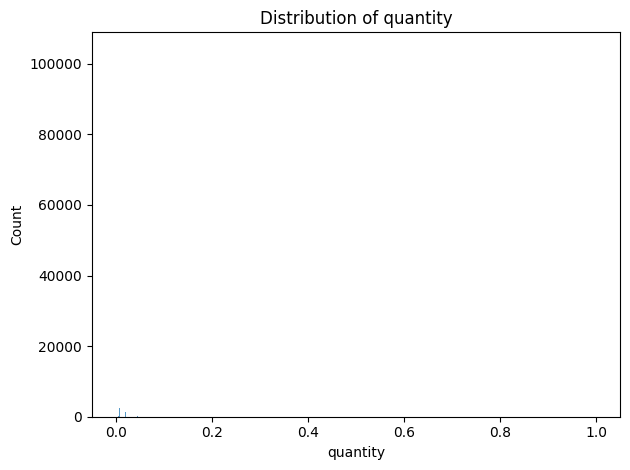

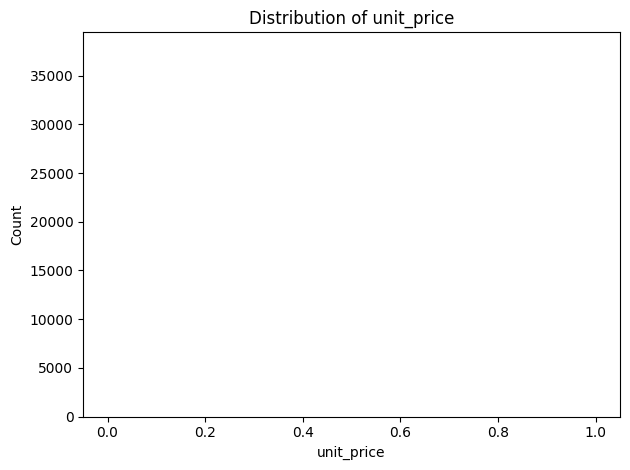

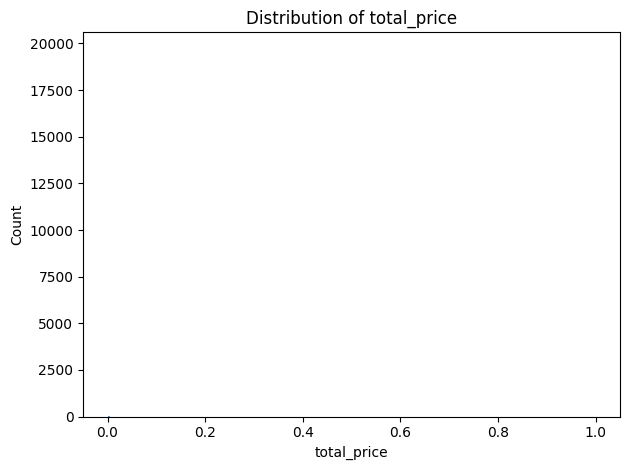

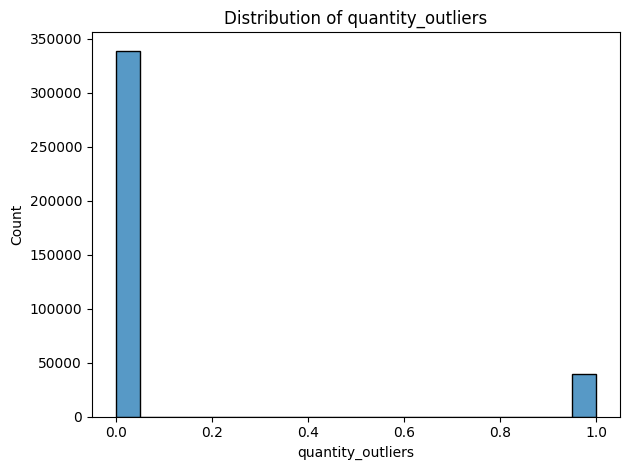

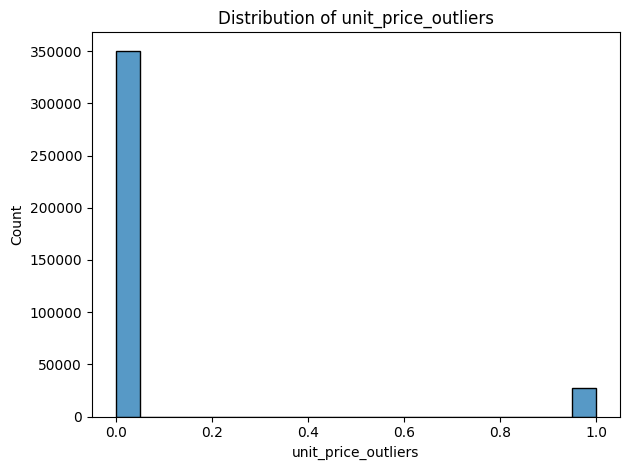

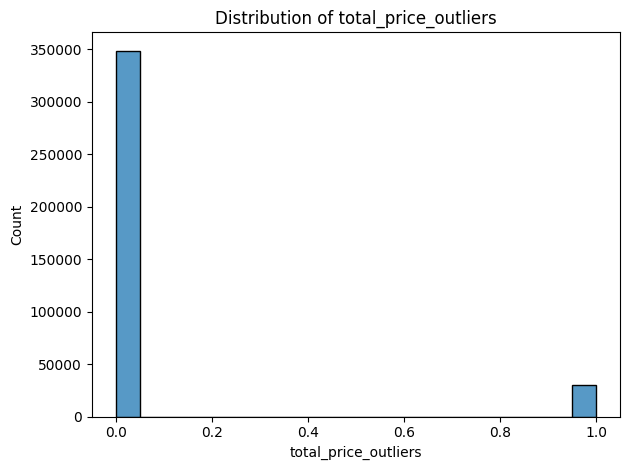

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = train_scaled.columns[(train_scaled.dtypes == 'float64') | (train_scaled.dtypes == 'int64')]

# Created histograms for numeric columns
for col in numeric_cols:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=train_scaled, x=col)
    plt.tight_layout()
    plt.show()

## Categorical data

## What is the distribution of categorical features?

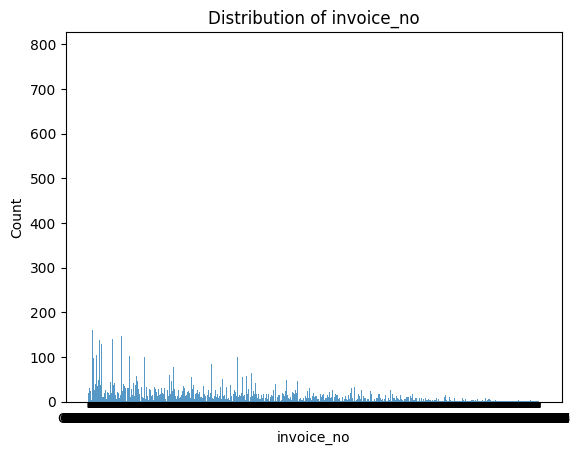

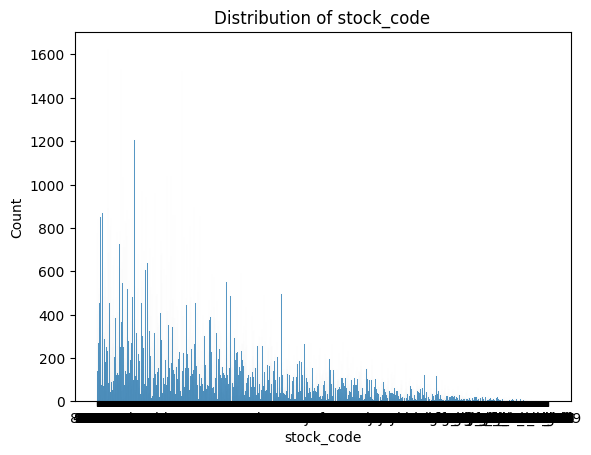

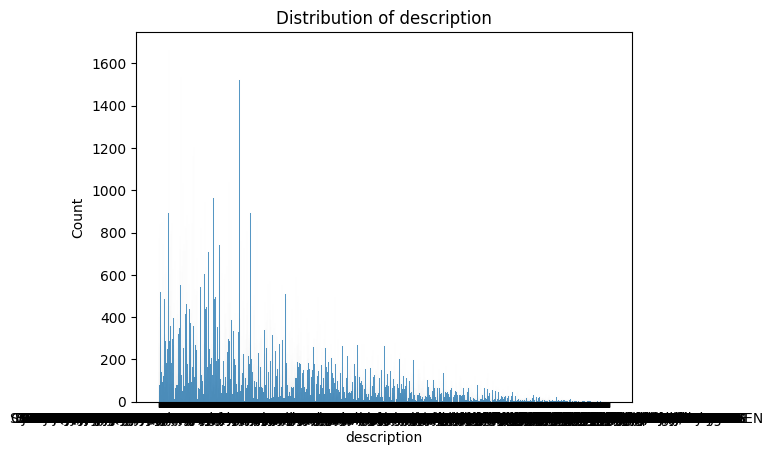

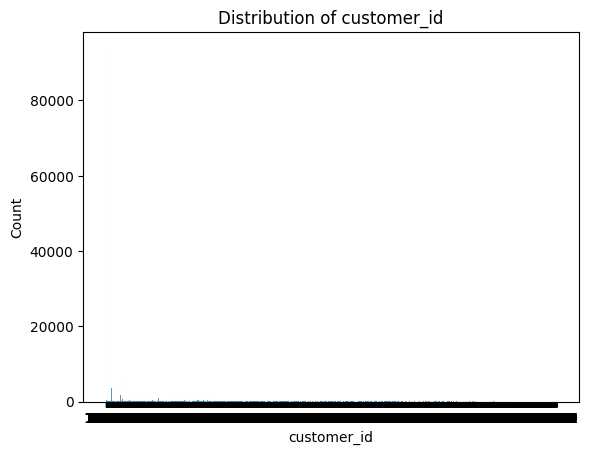

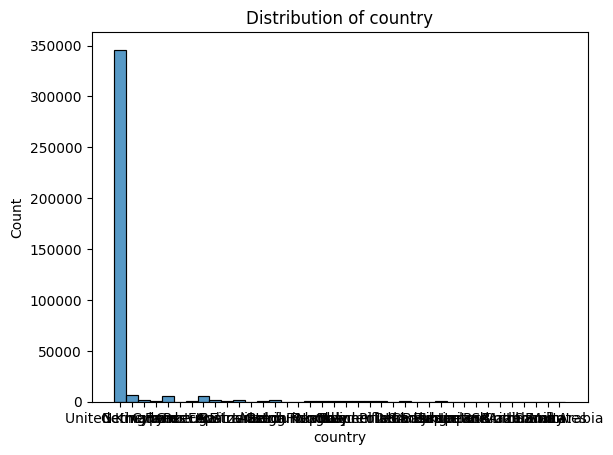

In [15]:
for col in train_scaled.columns[train_scaled.dtypes == 'object']:
    plt.figure()
    plt.title(f'Distribution of {col}')
    sns.histplot(data=train_scaled, x=col)
    plt.show()

# What does the correlation between all numerical features?

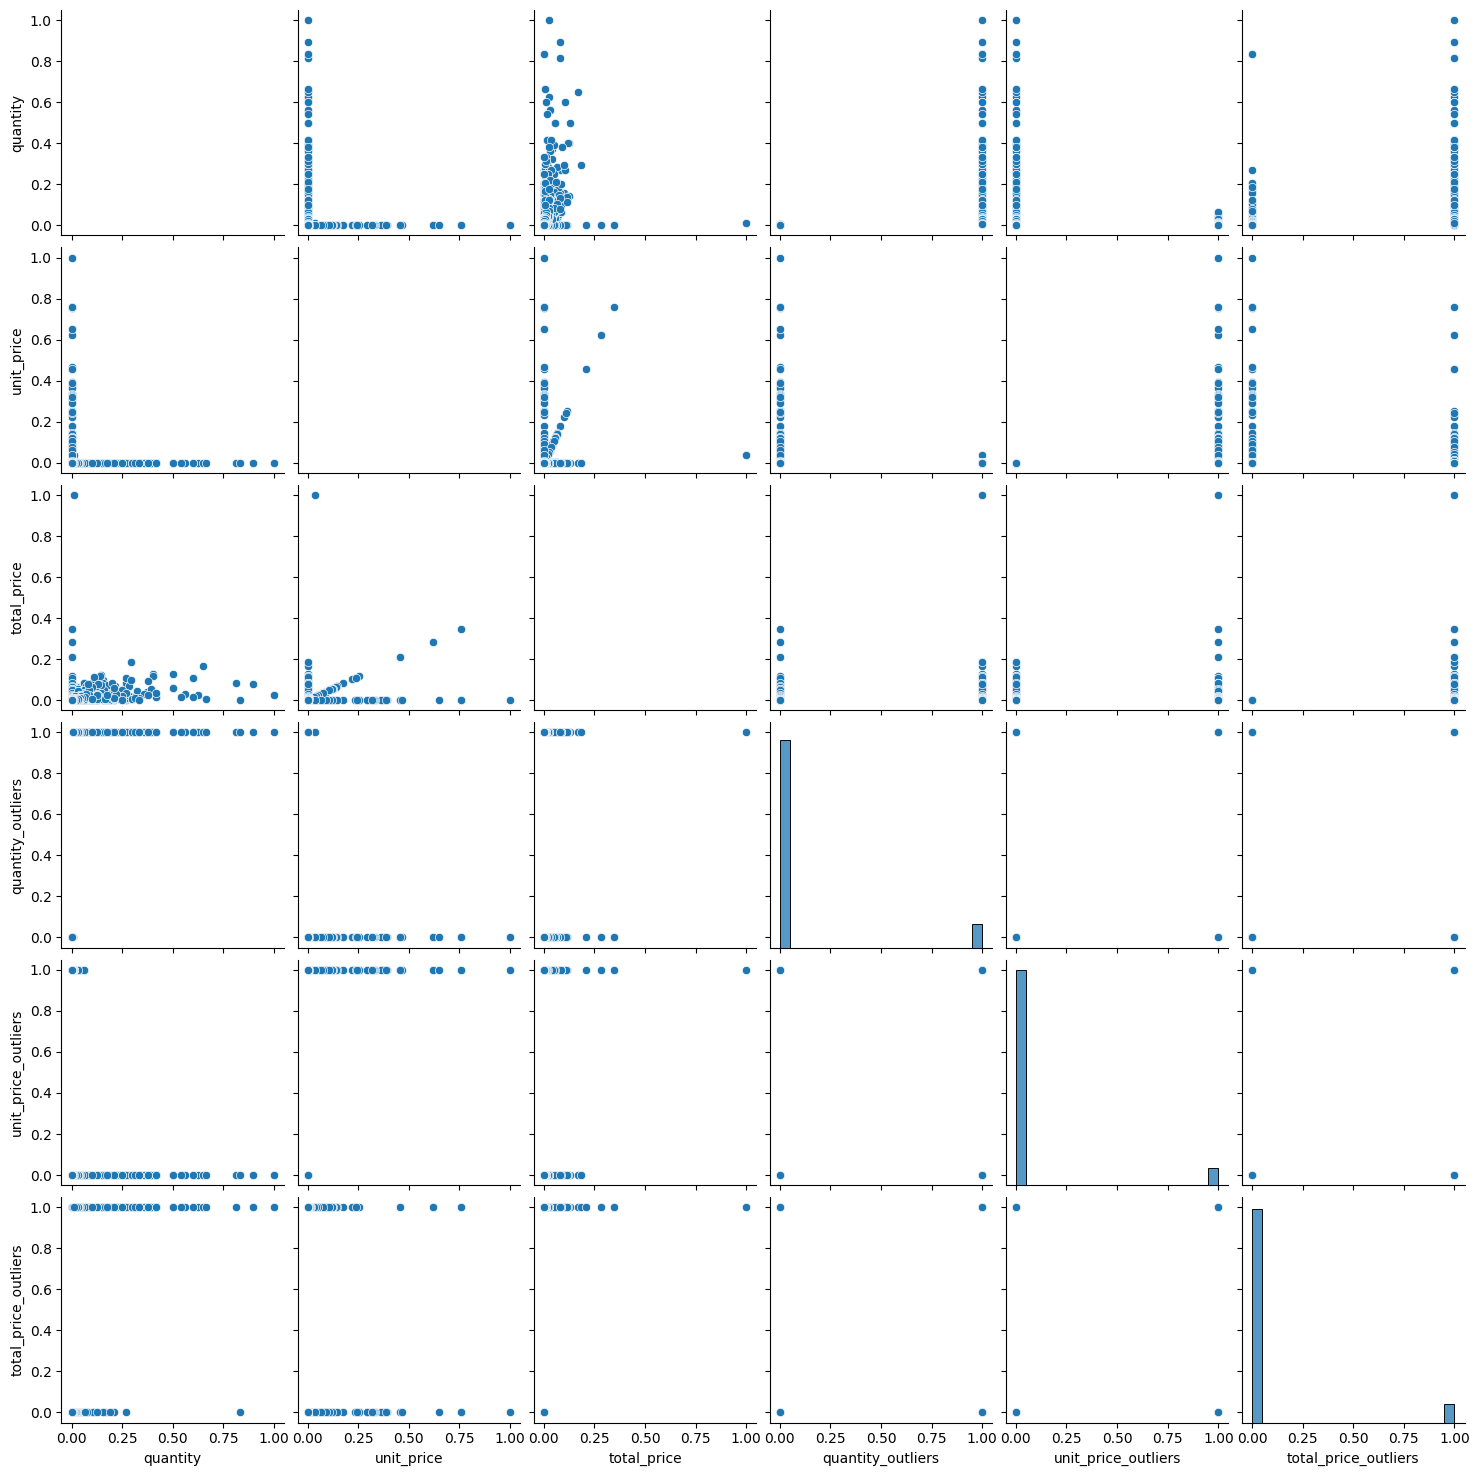

In [34]:
sns.pairplot(data = train_scaled, corner=False)

# what is the `country` count distributions within this data?

In [35]:
country_cnts = train_scaled.country.value_counts()
country_cnts = pd.DataFrame(country_cnts).reset_index()
country_cnts = country_cnts[country_cnts['count'] > 1000]

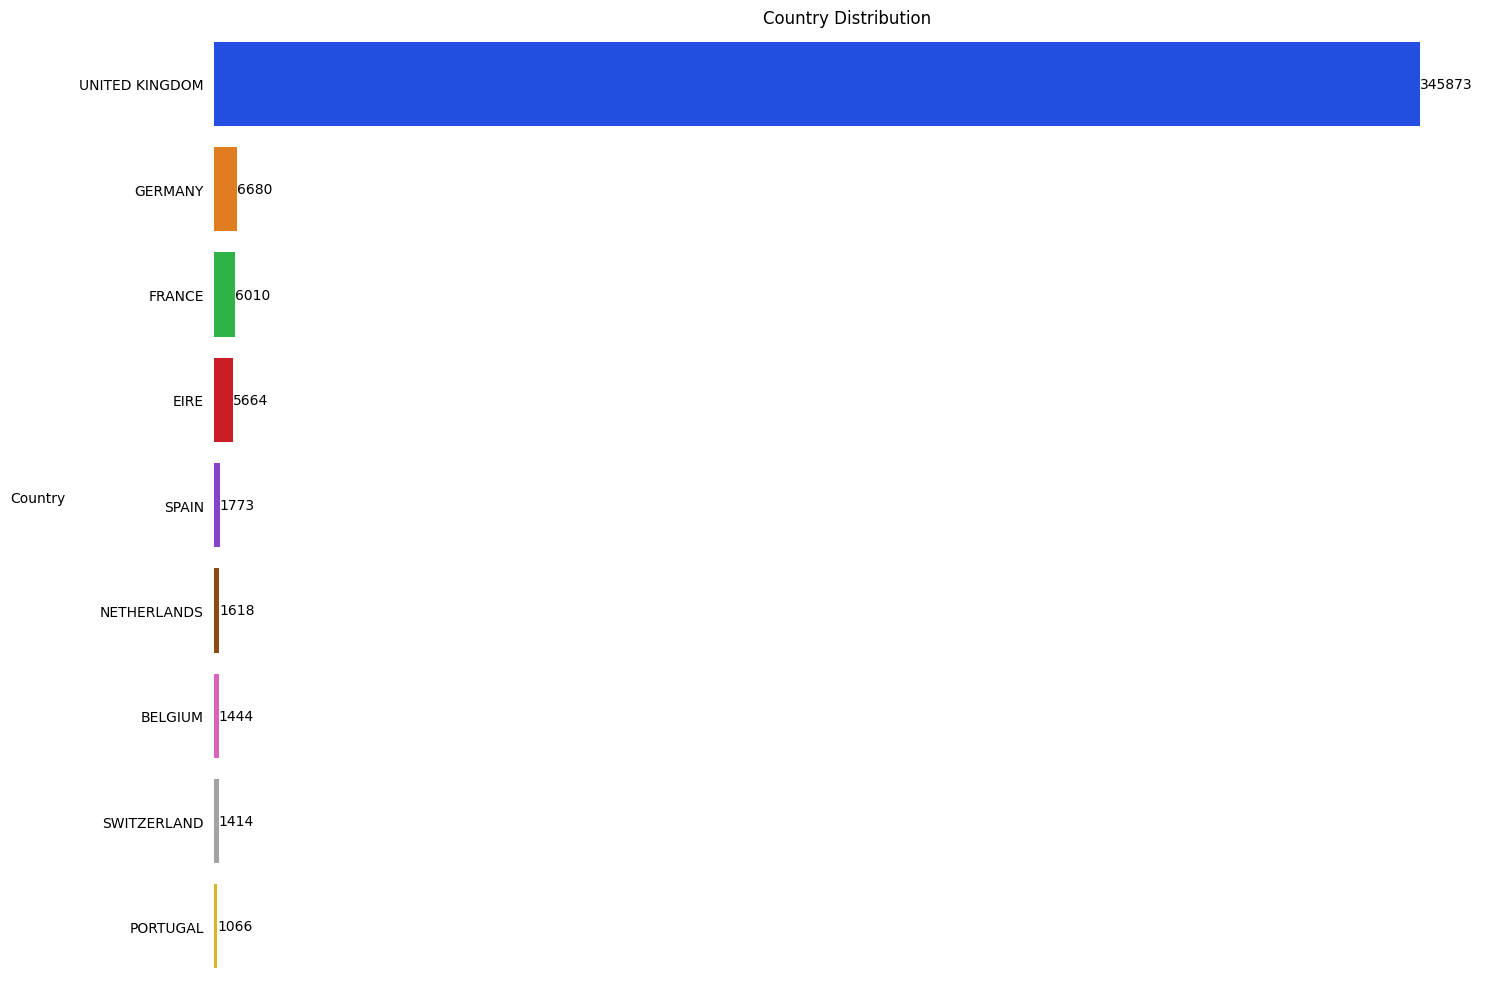

In [36]:
# set figsze
plt.figure(figsize=(15, 10))

# Create the bar plot
ax = sns.barplot(data=country_cnts, x='count', y='country', palette='bright')

# remove spines
sns.despine(left=True, bottom=True)

# adding values at the end of each bar
for p in ax.patches:
    
    ax.annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black')

# Remove x-tick labels, keeping the ticks
ax.set_xticklabels([])
ax.set_xticks([])

# Remove y ticks
ax.tick_params(axis='y', which='both', left=False)
# ax.tick_params(axis='x', which='both', bottom=False, xlabel=None)

        
# set labels
plt.title('Country Distribution')

# capitalize the y-axis labels
ax.set_yticklabels([label.get_text().upper() for label in ax.get_yticklabels()])

plt.ylabel('Country', rotation=0, labelpad=30)
plt.xlabel('')
plt.tight_layout()
plt.show()

* The data is comprised of alot of infmormation relating to the United Kingdom

## How does `quantity` vary with `customer_id`?

<Figure size 1000x600 with 0 Axes>

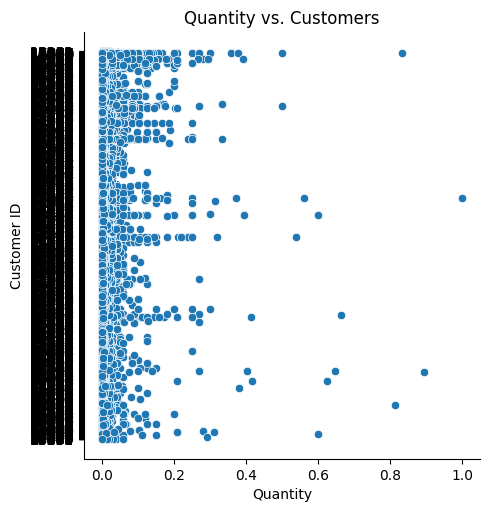

In [44]:
plt.figure(figsize=(10, 6))
sns.relplot(x='quantity', y='customer_id', data=train_scaled)
plt.title('Quantity vs. Customers')
plt.xlabel('Quantity')
plt.ylabel('Customer ID')
plt.show()

## how about `unit_price` and `customer_id`?

<Figure size 1000x600 with 0 Axes>

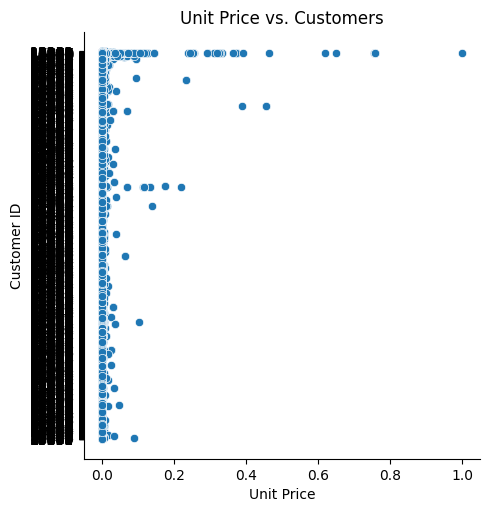

In [45]:
plt.figure(figsize=(10, 6))
sns.relplot(x='unit_price', y='customer_id', data=train_scaled)
plt.title('Unit Price vs. Customers')
plt.xlabel('Unit Price')
plt.ylabel('Customer ID')
plt.show()

## Is there a relationship between `total_price` and `quantity`?

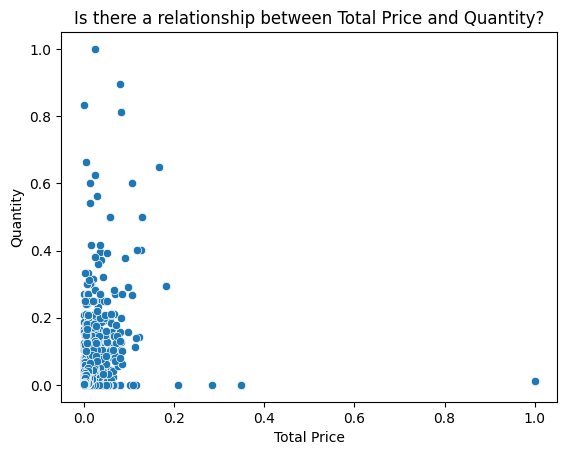

In [42]:
# plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_price', y='quantity', data=train_scaled)
plt.title('Is there a relationship between Total Price and Quantity?')
plt.xlabel('Total Price')
plt.ylabel('Quantity')
plt.show()

# -----------------------------------------------------------------

# How would scaling and normalizing features aid in getting a better visualization of distribution that exist within this dataset?

A data split and then scaling the train subset aided in providing a better visual and distribution of the data.

# Code added to prep function to handle negative values:

In [ ]:
# df['quantity'] = df['quantity'].apply(lambda x: max(x, 0))
    
# df['unit_price'] = df['unit_price'].apply(lambda x: max(x, 0))

# -----------------------------------------------------------------

## I have identified total price and quantity having a correlation, i may be able to use these features and find clusters that are drivers of total price in this dataset.

## I'm going to bin quantities:

In [52]:
train['quantity_bin'] = pd.cut(train.quantity, [0, 10, 20, 30, 40, 50, 10000])

train.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,total_price,quantity_outliers,unit_price_outliers,total_price_outliers,quantity_bin
429017,573531,85019B,BLOSSOM IMAGES NOTEBOOK SET,48,2011-10-31 12:43:00,1.25,12909,United Kingdom,60.00,1,0,1,"(40.0, 50.0]"
17975,537789,22867,HAND WARMER BIRD DESIGN,12,2010-12-08 12:49:00,2.10,14051,United Kingdom,25.20,0,0,0,"(10.0, 20.0]"
310789,564199,22697,GREEN REGENCY TEACUP AND SAUCER,1,2011-08-23 17:31:00,2.95,13263,United Kingdom,2.95,0,0,0,"(0.0, 10.0]"
319999,C564956,21452,TOADSTOOL MONEY BOX,0,2011-08-31 13:41:00,2.95,16303,United Kingdom,0.00,0,0,0,NaN
340436,566633,23241,TREASURE TIN GYMKHANA DESIGN,24,2011-09-14 10:40:00,2.08,17193,United Kingdom,49.92,1,0,1,"(20.0, 30.0]"


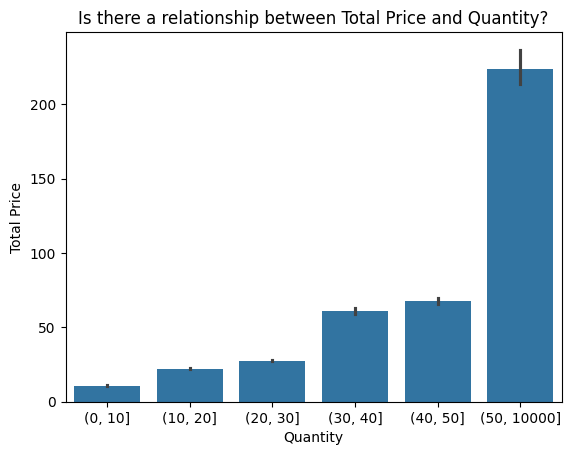

In [60]:
sns.barplot(x='quantity_bin', y='total_price', data=train)
plt.title('Is there a relationship between Total Price and Quantity?')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.show()

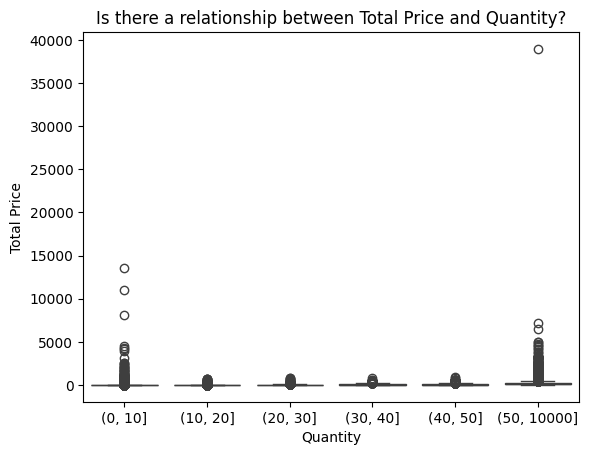

In [61]:
sns.boxplot(x='quantity_bin', y='total_price', data=train)
plt.title('Is there a relationship between Total Price and Quantity?')
plt.xlabel('Quantity')
plt.ylabel('Total Price')
plt.show()

In [62]:
train_scaled.quantity

429017    0.010000
17975     0.002500
310789    0.000208
319999    0.000000
340436    0.005000
            ...   
110593    0.000208
260134    0.000417
367094    0.002083
132328    0.000625
122303    0.002083
Name: quantity, Length: 378318, dtype: float64

In [ ]:
train_scaled['quantity_bin'] = pd.cut(train_scaled.quantity, [0, 10, 20, 30, 40, 50, 10000])

train_scaled.head()

In [65]:
train_scaled.columns.to_list()

['invoice_no',
 'stock_code',
 'description',
 'quantity',
 'invoice_date',
 'unit_price',
 'customer_id',
 'country',
 'total_price',
 'quantity_outliers',
 'unit_price_outliers',
 'total_price_outliers',
 'quantity_bin']

In [66]:
train_scaled.drop(column='quantity_bin')

TypeError: DataFrame.drop() got an unexpected keyword argument 'column'